In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [136]:
def lvq_fit(train, target, lrate, b, max_epoch):
  print('Original Train')
  print(train)
  print('Target before')
  print(target)
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.asarray([e for i, e in enumerate(zip(train, target)) if i not in train_idx], dtype='object')
  train, target = train[:, 0], train[:, 1]
  print('Train Now')
  print(train)
  print('Target Now')
  print(target)
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1

  return weight, label

### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [137]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

### c) Fungsi Hitung Akurasi

In [138]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Original Train
[[ 0.62048244 -0.4741692 ]
 [-2.44476059  1.52831312]
 [ 0.840299    0.91836882]
 [-0.78024258  0.99349307]
 [-0.67620909  0.70435141]
 [ 0.96214821  1.02626312]
 [-1.48211413 -1.86439541]
 [ 0.34189107 -2.50053414]
 [ 0.37731285 -2.53614228]
 [ 0.39235903 -0.13172775]
 [ 0.83497774 -0.66183577]
 [ 0.43070498  0.75219299]
 [ 1.36305805  1.34205466]
 [ 2.0734808   1.34016239]
 [ 1.63966383 -1.41644241]
 [-0.30929235 -1.17474452]
 [ 0.09207694 -0.31737273]
 [-0.47670787 -1.08086998]
 [-2.85033964  1.83871477]
 [ 1.76603954 -0.74435534]
 [ 1.79968084 -0.22181807]
 [-2.07267076  1.41559421]
 [-1.17107367  0.71567307]
 [ 1.36018615 -0.03907642]]
Target before
[1 0 1 0 0 1 2 2 2 1 2 1 1 1 2 2 1 1 0 2 0 0 0 0]
Train Now
[array([0.840299  , 0.91836882]) array([-0.78024258,  0.99349307])
 array([-0.67620909,  0.70435141]) array([0.96214821, 1.02626312])
 array([ 0.34189107, -2.50053414]) array([ 0.37731285, -2.53614228])
 array([ 0.39235903, -0.13172775]) array([ 0.83497774, -0.6

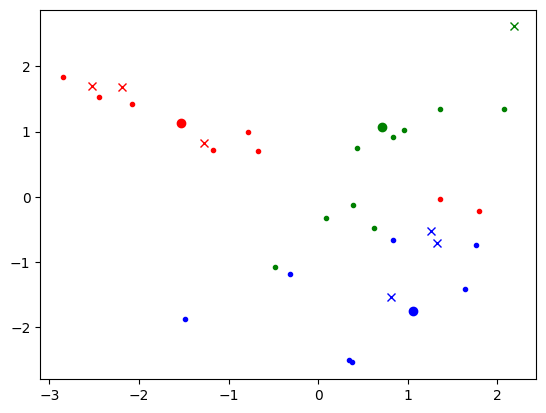

In [139]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

## Post-test

Pada post-test kali ini, teman-teman akan menggunakan Hand-written MNIST. Teman-teman harus bisa membangun model LVQ yang mampu mengklasifikasikan citra tulisan tangan ke bentuk sebenarnya.

**Unduh dataset dari google drive**

In [140]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

fish: Unknown command: gdown
fish: 
gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA
^~~~^


**Representasi file csv ke citra asli**

In [141]:
data = pd.read_csv('data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Teman-teman pada kali ini hanya diminta untuk melakukan klasifikasi 2 kelas. Hapus semua baris yang tidak berlabel 3 dan 4!

In [ ]:
# Hapus semua kelas, kecuali kelas x dan y, simpan ke variabel data_lite
data_lite = data[(data.label == 3) | (data.label == 4)].reset_index(drop=True)


data_lite.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


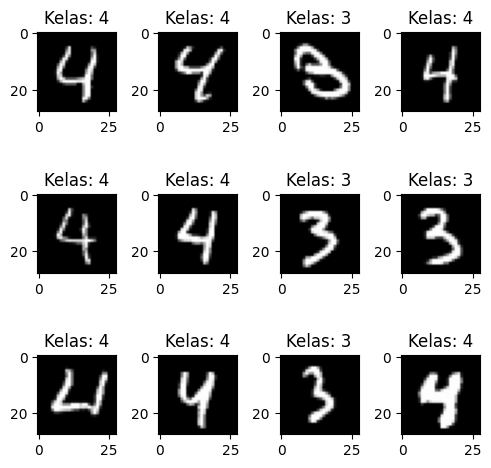

In [ ]:
selected = data_lite.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [ ]:
target = data_lite.iloc[:, 0]  # Kolom pertama adalah kolom kelas/target
data = data_lite.iloc[:, 1:]   # Sisanya adalah data


# Konversi data dan target ke dalam array NumPy, simpan ke variabel X dan y
X = data.values
y = target.values

Lakukan pelatihan menggunakan X_train dan uji dengan X_test. Set parameter lainnya agar teman-teman mendapatkan akurasi > 0,9.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #jangan ubah baris ini

model = lvq_fit(X_train, y_train, lrate=0.1, b=0.2, max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

print('Accuracy:', accuracy)

<ipython-input-3-972d1dfa3958>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


### Pertanyaan

1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!
2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

Jawaban

1.  Arsitektur LVQ yang terbangun memiliki input neuron sebanyak 784, dimana ini merupakan jumlah kolom yang dikurangi dengan kolom label. Dengan keluaran atau output neuronnya berjumlah 2, yaitu kelas prediksinya yaitu 3 dan 4
2.  Dalam pelatihan ini hyperparameter learning rate mengontrol sejauh dan seberapa cepat model LVQ mengubah bobot vektornya saat melatih data, sedangkan bias digunakan dalam beberapa implementasi LVQ sebagai parameter tambahan untuk memengaruhi proses pembelajaran, contohnya adalah seperti intervensi manusia. Dan epoch adalah satu iterasi penuh melalui seluruh dataset pelatihan. Dalam setiap epoch, model LVQ diperbarui berdasarkan data pelatihan